# **PMR3508 - Exercício Programa 02**: <br> **Redes Neurais e o Dataset MNIST**
---
---

## ✏️ **Cabeçalho**:

### **Nome**: `Caetano Passos de Alencar Filho`
### **Hash**: `57`

---

## 📜 **Descrição:**

Neste exercício, você irá trabalhar com o **dataset MNIST**, um conjunto de dados com 70.000 imagens de dígitos escritos à mão. Seu objetivo será aplicar os conceitos de **Redes Neurais Artificiais (ANNs)** vistos na aula teórica. Este EP está dividido em tarefas, sua formatação não deve ser alterada, mas novas células de código ou texto podem ser criadas nos blocos de cada tarefa.

---

## ⚠️ **Instruções:**
- Complete todas as tarefas abaixo, respondendo às perguntas e escrevendo o código necessário.
- Comente seu código para facilitar a correção.
- Entregue o notebook no formato `.ipynb`.

---



## ✅ **Tarefas:**

1. **Probabilidades de dígitos no *dataset***       ⇒ `2 pontos`
2. **Análise Exploratória de Dados (EDA)**          ⇒ `2 pontos`
3. **Treinamento e teste de Modelos**               ⇒ `2 pontos`
4. **Comunicação de Resultados e Visualizações**    ⇒ `2 pontos`
5. **Publicação no *Kaggle* e Documentação**        ⇒ `2 pontos`

---

<br>
<center>
        <h1>
        <b>
        BOA SORTE !!!
        </b>
        </h1>
</center>
<br>

---
---

## ⏳ Loading dos Dados

In [2]:
import pickle
import random
import numpy as np
import os
from os.path import join

# Configuração de seeds para replicabilidade
np.random.seed(42)  # Seed para NumPy
random.seed(42)     # Seed para o módulo random

input_path = os.getcwd()  # Obtém o diretório atual
images_filepath = join(input_path, 'MNIST-images.pkl')
labels_filepath = join(input_path, 'MNIST-labels.pkl')
validation_images_filepath = join(input_path, 'MNIST-validation-images.pkl')

with open(images_filepath, 'rb') as f:
    X_tot = pickle.load(f)

with open(labels_filepath, 'rb') as f:
    y_tot = pickle.load(f)

with open(validation_images_filepath, 'rb') as f:
    X_val = pickle.load(f)

In [3]:
type(X_tot)
X_tot.shape

(60000, 28, 28)

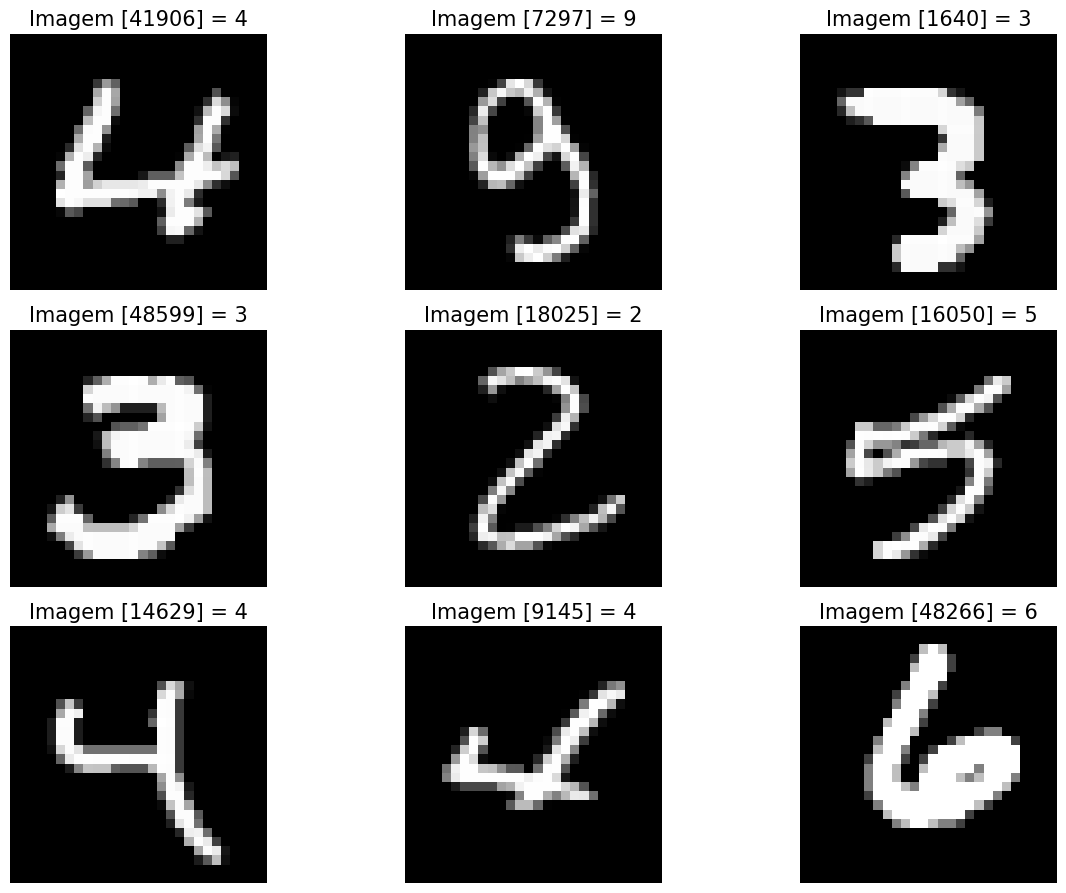

In [4]:
'''
TESTE DE CARREGAMENTO DO DATASET POR VISUALIZAÇÃO
Este bloco visualiza algumas imagens do dataset MNIST para verificar se o
carregamento foi realizado corretamente.
'''

%matplotlib inline
import random
import matplotlib.pyplot as plt


def show_images(images, title_texts):
    # Função para mostrar as imagens com seus respectivos títulos
    cols = 3  # Número de colunas na visualização
    rows = int(len(images) / cols) + 1  # Calcula o número de linhas
    plt.figure(figsize=(12, 12))  # Define o tamanho da figura
    index = 1
    for x in zip(images, title_texts):  # Itera sobre as imagens e títulos
        image = x[0]
        title_text = x[1]
        plt.subplot(rows, cols, index)  # Adiciona um subplot
        plt.axis('off')  # Desativa os eixos
        plt.imshow(image, cmap=plt.cm.gray)  # Mostra a imagem em escala de cinza
        if (title_text != ''):
            plt.title(title_text, fontsize=15)  # Define o título da imagem
        index += 1
    plt.tight_layout()  # Ajusta o layout para evitar sobreposição de títulos
    plt.show()  # Exibe a figura com as imagens e títulos

images_2_show = []  # Lista para armazenar as imagens a serem mostradas
titles_2_show = []  # Lista para armazenar os títulos das imagens
# Seleciona aleatoriamente 9 imagens de treino
for i in range(0, 9):
    r = random.randint(1, 60000)
    images_2_show.append(X_tot[r])  # Adiciona a imagem selecionada à lista
    titles_2_show.append(f"Imagem [{str(r)}] = {str(y_tot[r])}")  # Adiciona o título correspondente

show_images(images_2_show, titles_2_show)  # Exibe as imagens selecionadas

In [5]:
# Imagens info
print(f"Imagens de treino: {len(X_tot)}")
print(f"Imagens de validação: {len(X_val)}")
image_pixel_x, image_pixel_y = X_tot[0].shape
print(f"Resolução das imagens: {image_pixel_x}x{image_pixel_y}")

Imagens de treino: 60000
Imagens de validação: 10000
Resolução das imagens: 28x28


# 0️⃣ Suas bibliotecas

In [6]:
#Sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Visualização de imagens com interação
from bokeh.io import output_notebook, show
from bokeh.layouts import column
from bokeh.plotting import figure
from bokeh.models import Slider, ColumnDataSource, CustomJS


import numpy as np
%pip install bokeh


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# 1️⃣ Tarefa 01: Probabilidades 🎲

## 🧑🏻‍💻 Item a)

Descubra o número do Dataset associado ao seu Hash.



Hash: 57

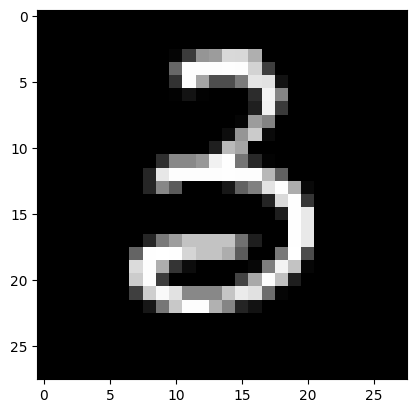

In [7]:

_hash = 57
#Pega o elemento da posição hash
plt.imshow(X_tot[_hash], cmap='gray')
#Aumenta a imagem

plt.show()

In [8]:
target_class = 3

## 🔦 Item b)

Determine, para a imagem vinculada ao seu Hash, qual é a Probabilidade de um píxel claro (128 - 225) para esta única imagem?

In [9]:
#Função que conta quantos pixels acima do threshold existem na imagem
def count_pixels_above_threshold(image, threshold):
    return np.sum(image > threshold)
    
#Aplica a função find_threshold na imagem hash com threshold 128
white_pixels_int = count_pixels_above_threshold(X_tot[_hash], 128)


In [10]:
#Caclula a porcentagem de pixels brancos sabendo que a imagem tem 28x28 pixels
white_pixels_probability_hash = (white_pixels_int/(image_pixel_x*image_pixel_y))*100
print(f"Probabilidade de pixels brancos na imagem de indice {_hash} e classe {target_class}: {white_pixels_probability_hash:.4}%")

Probabilidade de pixels brancos na imagem de indice 57 e classe 3: 11.1%


## ♟️ Item c)

Qual é a probabilidade de um píxel ser claro dentre todos os píxeis que tem a mesma classe que a sua imagem obtida em a)?

In [11]:
#Função procura por todos os indices de uma classe retornando um np.array
def find_all_indexes(y : np.ndarray, target_class: int) -> np.ndarray:
    return np.where(y == target_class)[0]
all_indexes = find_all_indexes(y_tot, target_class)

In [12]:
# Selecione os elementos de X_tot com base em all_indexes
selected_elements = X_tot[all_indexes]
# Conte o número de elementos acima do limite
count = np.sum(selected_elements >= 128) 
print(f"Total de pixels brancos nas imagens de classe {target_class}: {count}")    

Total de pixels brancos nas imagens de classe 3: 689629


In [13]:
white_pixels_probability_class = (count/(image_pixel_x*image_pixel_y*len(all_indexes)))*100
print(f"Probabilidade de pixels brancos nas imagens de classe {target_class}: {white_pixels_probability_class:.4}%")

Probabilidade de pixels brancos nas imagens de classe 3: 14.4%


---

# 2️⃣ Tarefa 02: Análise Exploratória de Dados 📊

## ✨ Item a)

Conte quantas vezes cada dígito (de 0 a 9) aparece e responda:

1. Todos os dígitos aparecem a mesma quantidade?

2. Qual o valor médio dos píxeis de cada dígito?

In [14]:
histogram_quantity_per_class = [0]*10

for i in range(0, 10):
    histogram_quantity_per_class[i] = len(find_all_indexes(y_tot, i))
    print(f"Quantidade de imagens da classe {i}: {histogram_quantity_per_class[i]}")

Quantidade de imagens da classe 0: 5920
Quantidade de imagens da classe 1: 6725
Quantidade de imagens da classe 2: 6023
Quantidade de imagens da classe 3: 6107
Quantidade de imagens da classe 4: 5918
Quantidade de imagens da classe 5: 5376
Quantidade de imagens da classe 6: 5915
Quantidade de imagens da classe 7: 6238
Quantidade de imagens da classe 8: 5856
Quantidade de imagens da classe 9: 5922


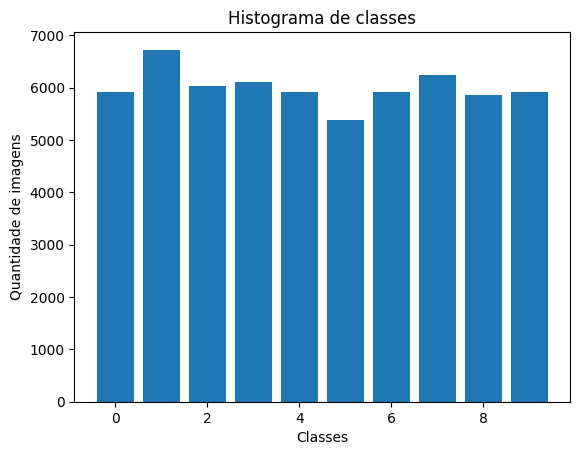

In [15]:
plt.bar(range(0,10), histogram_quantity_per_class)
#Faz um plt mais bonito
plt.xlabel('Classes')
plt.ylabel('Quantidade de imagens')
plt.title('Histograma de classes')
plt.show()

In [16]:
histogram_mean_pixel_intensity=[0]*10
#Calcula a média de intensidade de pixels para cada classe
for i in range(0, 10):
    count = 0
    #Para cada imagem da classe i, calcula a média de intensidade de pixels
    for j in find_all_indexes(y_tot, i):
        count+=np.mean(X_tot[j])
    histogram_mean_pixel_intensity[i] = count/len(find_all_indexes(y_tot, i))
    print(f"Média de intensidade de pixels da classe {i}: {histogram_mean_pixel_intensity[i]:.3}")

Média de intensidade de pixels da classe 0: 44.2
Média de intensidade de pixels da classe 1: 19.4
Média de intensidade de pixels da classe 2: 38.0
Média de intensidade de pixels da classe 3: 36.2
Média de intensidade de pixels da classe 4: 31.0
Média de intensidade de pixels da classe 5: 32.9
Média de intensidade de pixels da classe 6: 35.2
Média de intensidade de pixels da classe 7: 29.3
Média de intensidade de pixels da classe 8: 38.4
Média de intensidade de pixels da classe 9: 31.3


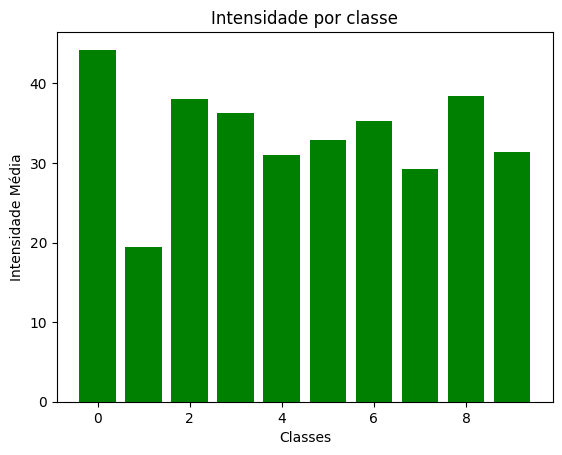

In [17]:
plt.bar(range(0,10), histogram_mean_pixel_intensity, color='green')
plt.xlabel('Classes')
plt.ylabel('Intensidade Média')
plt.title('Intensidade por classe')
plt.show()

### Resposta 01: Não

### Resposta 02: Há variação

### Resposta 03: ??

## 📏 Item b)

Faça um histograma que mostre a distribuição dos valores dos píxeis para cada dígito. Há muitos valores que são “apagados” (ou seja, com valor 0) ou a distribuição dos valores é mais equilibrada entre os dígitos?


In [18]:
# Calcula a distribuição de pixels para uma determinada imagem
def calculate_pixel_distribution(image: np.ndarray) -> np.ndarray:
    # A imagem deve conter valores inteiros entre 0 e 255
    #ravel transforma a matriz em um vetor unidimensional
    dist = np.bincount(image.ravel(), minlength=256) # np.bincount conta a quantidade de cada valor inteiro
    return dist

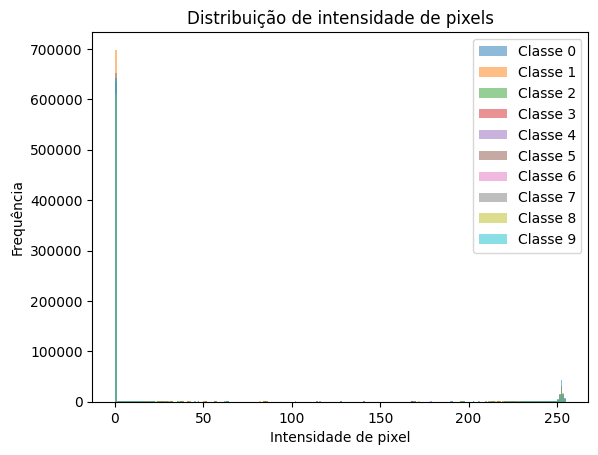

In [19]:
data_amount_per_class = 1000

for i in range(0, 10):
    dist = np.zeros(256)
    classeLista = find_all_indexes(y_tot, i)[0:data_amount_per_class]
    for j in range(len(classeLista)):
        dist += calculate_pixel_distribution(X_tot[classeLista[j]])
    plt.hist(range(256), weights=dist, bins=256, alpha=0.5, label=f"Classe {i}")

plt.legend()
plt.xlabel('Intensidade de pixel')
plt.ylabel('Frequência')
plt.title('Distribuição de intensidade de pixels')
plt.show()

<div style="background-color: #eef6fc; border: 2px solid #007bff; border-radius: 12px; padding: 20px; font-family: Arial, sans-serif; color: #333333;">
    <h2 style="text-align: center; color: #2b6cb0; font-family: Arial, sans-serif; font-weight: bold; margin-bottom: 20px;">
        Distribuição de Intensidade de Pixels
    </h2>
    <p style="font-size: 18px; line-height: 1.8; color: #4a5568; font-family: 'Verdana', sans-serif; margin-bottom: 15px;">
        A análise da distribuição de intensidade de pixels na base de dados MNIST revela algumas características importantes:
    </p>
    <ul style="font-size: 18px; line-height: 1.8; color: #4a5568; font-family: 'Verdana', sans-serif; margin-left: 20px; padding-left: 20px;">
        <li>
            A maior concentração de pixels ocorre na 
            <strong style="color: #2c5282;">intensidade 0</strong>, indicando que a maioria das imagens é composta por grandes áreas de fundo preto.
        </li>
        <li>
            Há um pico menor em torno da 
            <strong style="color: #2c5282;">intensidade 255</strong>, representando pixels brancos que compõem os traços dos dígitos.
        </li>
        <li>
            Os valores intermediários (entre 50 e 200) têm baixa frequência, o que sugere que tons de cinza são pouco utilizados nas imagens.
        </li>
        <li>
            Embora todas as classes (0 a 9) sigam um padrão geral semelhante, pequenas variações podem ser observadas devido à forma e complexidade dos dígitos.
        </li>
    </ul>
    <p style="font-size: 18px; line-height: 1.8; color: #4a5568; font-family: 'Verdana', sans-serif; margin-top: 20px;">
        <strong style="color: #2b6cb0;">Conclusão:</strong> 
        A distribuição confirma que os dados são altamente binarizados, com predominância de áreas pretas e brancas. Isso é consistente com as características esperadas da base MNIST.
    </p>
</div>

## 🤓 Item c)

Crie uma imagem para cada dígito (de 0 a 9) em que cada píxel dessa nova imagem representa a média do valor dos píxeis para aquela classe. Você consegue reconhecer os dígitos nas imagens criadas?

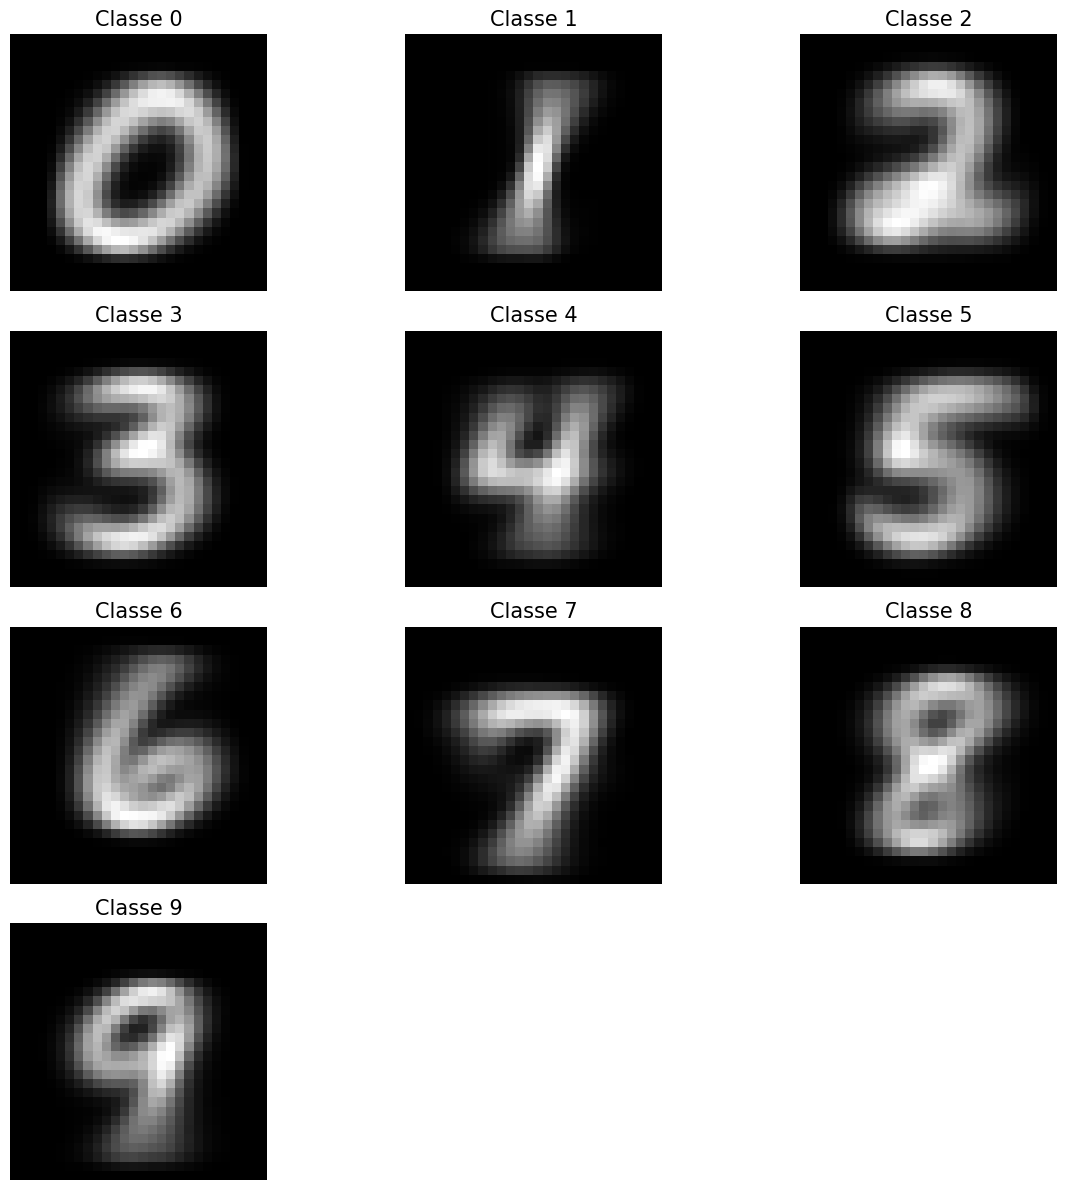

In [20]:
images = []
title_texts = []

for i in range(0, 10):
    #Instancia uma matriz nula
    sum_matrix = np.zeros((28, 28))
    all_indexes = find_all_indexes(y_tot, i)
    for j in all_indexes:
        #Soma todas as matrizes de imagens da classe i
        sum_matrix += X_tot[j]
    #Para cada elemento da matriz de soma cria uma imagem com a média
    mean_matrix = sum_matrix/len(all_indexes)
    images.append(mean_matrix)
    title_texts.append(f"Classe {i}")
   

show_images(images, title_texts)

## É possivel diferenciar as classes pelas imagens

<head>
    <title>Explicação sobre o Pré-processamento de Dados</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            line-height: 1.6;
        }

        h1 {
            color: #4CAF50;
            text-align: center;
        }

        h2 {
            color: #2196F3;
        }

        p {
            color: #333;
        }

        ul {
            background-color: #f9f9f9;
            border: 1px solid #ddd;
            padding: 10px;
            border-radius: 5px;
        }

        li {
            color: #555;
        }
    </style>
</head>

<body>
    <h1>Pré-processamento de Dados</h1>

    <h2 style="color: #FF5722;">1. Transformação de Imagens</h2>
    <p style="color: #555;">
        Para treinar o modelo, as imagens são convertidas em vetores. Isso significa "achatar" cada imagem (2D) em uma
        única linha com todos os seus pixels.
        Assim, cada imagem se torna um vetor de características que o modelo pode processar.
    </p>

    <h2 style="color: #FF9800;">2. Divisão do Dataset</h2>
    <p style="color: #555;">
        Após a transformação, os dados são divididos em dois conjuntos:
    </p>
    <ul>
        <li><b style="color: #4CAF50;">Treinamento:</b> Usado para ajustar os pesos do modelo.</li>
        <li><b style="color: #F44336;">Teste:</b> Usado para avaliar o desempenho do modelo com novos dados.</li>
    </ul>
    <p style="color: #555;">
        No exemplo, 80% dos dados são para treinamento e 20% para teste. O parâmetro <code>random_state=42</code>
        garante que essa divisão seja sempre a mesma.
    </p>

    <h2 style="color: #9C27B0;">Conclusão</h2>
    <p style="color: #555;">
        Esses passos preparam os dados para que o modelo possa aprender de forma eficiente e ser avaliado corretamente.
        A transformação em vetores facilita o processamento, e a divisão em treino e teste permite uma análise clara do
        desempenho.
    </p>

<div style="background-color: #eef6fc; border: 2px solid #007bff; border-radius: 12px; padding: 20px; font-family: Arial, sans-serif; color: #333333;">
  <h2 style="text-align: center; color: #1c6ea4; font-weight: bold; margin-bottom: 20px;">Setup para Tarefa 3</h2>
  <p style="font-size: 18px; line-height: 1.8; color: #4a5568; margin-bottom: 20px; font-family: 'Verdana', sans-serif">
    Este código implementa funcionalidades essenciais para treinamento e monitoramento de um modelo de aprendizado de máquina. Ele pode ser dividido nas seguintes partes:
  </p>

  <ol style="font-size: 18px; line-height: 1.8; color: #4a5568; margin-left: 20px; padding-left: 20px; font-family: 'Verdana', sans-serif">
    <li>
      <strong style="color: #2c5282;">Transformação de imagens em vetores:</strong> 
      As imagens do dataset (<code style="color: #1c6ea4; background-color: #e3f2fd; padding: 2px 4px; border-radius: 4px;">X_tot</code>) são achatadas em vetores 1D usando 
      <code style="color: #1c6ea4; background-color: #e3f2fd; padding: 2px 4px; border-radius: 4px;">reshape</code> para facilitar o processamento pelo modelo.
    </li>
    <li style="margin-top: 15px;">
      <strong style="color: #2c5282;">Divisão do dataset:</strong> 
      O conjunto de dados é dividido em treino e teste com 20% reservado para o teste, usando a função 
      <code style="color: #1c6ea4; background-color: #e3f2fd; padding: 2px 4px; border-radius: 4px;">train_test_split</code>.
    </li>
    <li style="margin-top: 15px;">
      <strong style="color: #2c5282;">Função <code style="color: #1c6ea4; background-color: #e3f2fd; padding: 2px 4px; border-radius: 4px;">tracking_epochs</code>:</strong>
      <ul style="margin-top: 10px; list-style-type: disc; margin-left: 40px; padding-left: 20px;">
        <li>
          <em>Objetivo:</em> Rastrear o desempenho de um modelo MLP ao longo de várias épocas de treinamento.
        </li>
        <li>
          <em>Entradas:</em> Um modelo 
          <code style="color: #1c6ea4; background-color: #e3f2fd; padding: 2px 4px; border-radius: 4px;">MLPClassifier</code> 
          com <code style="color: #1c6ea4; background-color: #e3f2fd; padding: 2px 4px; border-radius: 4px;">warm_start=True</code> 
          e o número de épocas.
        </li>
        <li>
          <em>Processo:</em>
          <ul style="margin-top: 10px; list-style-type: circle; margin-left: 20px; padding-left: 20px;">
            <li>
              <strong>Loss (Perda):</strong> Obtida de 
              <code style="color: #1c6ea4; background-color: #e3f2fd; padding: 2px 4px; border-radius: 4px;">model.loss_</code>.
            </li>
            <li>
              <strong>Acurácia no treino:</strong> Calculada usando 
              <code style="color: #1c6ea4; background-color: #e3f2fd; padding: 2px 4px; border-radius: 4px;">accuracy_score</code> 
              no conjunto de treinamento.
            </li>
            <li>
              <strong>Acurácia no teste:</strong> Calculada de forma semelhante para o conjunto de teste.
            </li>
          </ul>
        </li>
        <li>
          <em>Saídas:</em> Retorna três listas: 
          <code style="color: #1c6ea4; background-color: #e3f2fd; padding: 2px 4px; border-radius: 4px;">losses</code>, 
          <code style="color: #1c6ea4; background-color: #e3f2fd; padding: 2px 4px; border-radius: 4px;">accuracies_train</code>, 
          e <code style="color: #1c6ea4; background-color: #e3f2fd; padding: 2px 4px; border-radius: 4px;">accuracies_test</code>.
        </li>
      </ul>
    </li>
  </ol>

  <p style="margin-top: 20px; background-color: #e3f2fd; padding: 15px; border-radius: 6px; color: #2d3e50; font-family: 'Verdana', sans-serif">
    Durante o treinamento, os resultados (loss, acurácias de treino e teste) são exibidos em cada época para ajudar no monitoramento do progresso.
  </p>
</div>

In [ ]:
#Transforma as imagens em vetores
X_tot_flat = X_tot.reshape(X_tot.shape[0], image_pixel_x*image_pixel_y)
#Divide o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_tot_flat, y_tot, test_size=0.2, random_state=42);



In [22]:
def tracking_epochs(model, epochs):
    """
    Realiza o rastreamento do desempenho do modelo ao longo de múltiplas épocas.
    
    Parâmetros:
        model: MLPClassifier - modelo MLP do scikit-learn com warm_start=True.
        epochs: int - número de épocas para o treinamento.
    
    Retorna:
        Tuple - (losses, accuracies_train, accuracies_test)
    """
    losses, accuracies_train, accuracies_test = [], [], []

    for epoch in range(epochs):
        # Treina o modelo no conjunto de treino
        model.fit(X_train, y_train)

        # Calcula o loss após a época
        losses.append(model.loss_)

        # Acurácia no conjunto de treino
        y_pred_train = model.predict(X_train)
        accuracies_train.append(accuracy_score(y_train, y_pred_train))

        # Acurácia no conjunto de teste
        y_pred_test = model.predict(X_test)
        accuracies_test.append(accuracy_score(y_test, y_pred_test))

        print(f"Epoch {epoch + 1}/{epochs} - Loss: {model.loss_:.4f}, "
              f"Train Accuracy: {accuracies_train[-1]:.4f}, Test Accuracy: {accuracies_test[-1]:.4f}")

    return losses, accuracies_train, accuracies_test


---

# 3️⃣ Tarefa 03: Treinamento e Teste de Modelos 🤖

## 📈 Item a)

Treine a ANN1 com 784 entradas, 8 neurônios na 1⁠ª camada oculta, 8 neurônios na 2⁠ª camada oculta e 10 saídas. Utilize 5 épocas para o treinamento. Use a biblioteca `scikit-learn`:

- Input Layer: 784 entradas (28x28);
- Hidden Layer 1: 8 neurônios;
- Hidden Layer 2: 8 neurônios;
- Output Layer: 10 saídas; (Classificador 0-9)
- Treine com 10 épocas.

In [23]:
#Cria o modelo
model_1 = MLPClassifier(hidden_layer_sizes=(8,8), max_iter=1, random_state=42,warm_start=True, verbose=False)

#Treina o modelo
losses1, accuracies_train1, accuracies_test1 = tracking_epochs(model_1, 10)



C:\Users\dante\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 1/10 - Loss: 3.0759, Train Accuracy: 0.1849, Test Accuracy: 0.1872


C:\Users\dante\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 2/10 - Loss: 1.8666, Train Accuracy: 0.3586, Test Accuracy: 0.3628


C:\Users\dante\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 3/10 - Loss: 1.5341, Train Accuracy: 0.4254, Test Accuracy: 0.4275


C:\Users\dante\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 4/10 - Loss: 1.3084, Train Accuracy: 0.5636, Test Accuracy: 0.5616


C:\Users\dante\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 5/10 - Loss: 1.0454, Train Accuracy: 0.6196, Test Accuracy: 0.6114


C:\Users\dante\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 6/10 - Loss: 0.9281, Train Accuracy: 0.6504, Test Accuracy: 0.6447


C:\Users\dante\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 7/10 - Loss: 0.8660, Train Accuracy: 0.6699, Test Accuracy: 0.6671


C:\Users\dante\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 8/10 - Loss: 0.8226, Train Accuracy: 0.6913, Test Accuracy: 0.6873


C:\Users\dante\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 9/10 - Loss: 0.7655, Train Accuracy: 0.7931, Test Accuracy: 0.7854


C:\Users\dante\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 10/10 - Loss: 0.6359, Train Accuracy: 0.8361, Test Accuracy: 0.8289


In [24]:
#Printa os resultados
print(f"Acurácia de treino: {accuracies_train1[-1]:.4f}")
print(f"Acurácia de teste: {accuracies_test1[-1]:.4f}")
print(f"Loss: {losses1[-1]:.4f}")

Acurácia de treino: 0.8361
Acurácia de teste: 0.8289
Loss: 0.6359


## 📉 Item b)

Treine a ANN2 com 784 entradas, 256 neurônios na 1⁠ª camada oculta, 256 neurônios na 2⁠ª camada oculta, 256 neurônios na 3ª camada oculta, 256 neurônios na 4ª camada oculta e 10 saídas. Utilize 20 épocas dessa vez. Use a biblioteca `scikit-learn`.

- Input Layer: 784 entradas (28x28);
- Hidden Layer 1: 256 neurônios;
- Hidden Layer 2: 256 neurônios;
- Hidden Layer 3: 256 neurônios;
- Hidden Layer 4: 256 neurônios;
- Output Layer: 10 saídas; (Classificação 0-9)
- Treine com 20 épocas.

In [25]:
#Cria o modelo
model_2 = MLPClassifier(hidden_layer_sizes=(256,256,256,256), max_iter=1, random_state=42,warm_start=True, verbose=False)
#Treina o modelo
losses2, accuracies_train2, accuracies_test2 = tracking_epochs(model_2, 20)

C:\Users\dante\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 1/20 - Loss: 1.1100, Train Accuracy: 0.9464, Test Accuracy: 0.9281


C:\Users\dante\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 2/20 - Loss: 0.2776, Train Accuracy: 0.9545, Test Accuracy: 0.9393


C:\Users\dante\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 3/20 - Loss: 0.1808, Train Accuracy: 0.9684, Test Accuracy: 0.9529


C:\Users\dante\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 4/20 - Loss: 0.1318, Train Accuracy: 0.9741, Test Accuracy: 0.9612


C:\Users\dante\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 5/20 - Loss: 0.1058, Train Accuracy: 0.9791, Test Accuracy: 0.9631


C:\Users\dante\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 6/20 - Loss: 0.0891, Train Accuracy: 0.9764, Test Accuracy: 0.9587


C:\Users\dante\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 7/20 - Loss: 0.0759, Train Accuracy: 0.9847, Test Accuracy: 0.9688


C:\Users\dante\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 8/20 - Loss: 0.0722, Train Accuracy: 0.9802, Test Accuracy: 0.9645


C:\Users\dante\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 9/20 - Loss: 0.0622, Train Accuracy: 0.9862, Test Accuracy: 0.9683


C:\Users\dante\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 10/20 - Loss: 0.0551, Train Accuracy: 0.9862, Test Accuracy: 0.9685


C:\Users\dante\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 11/20 - Loss: 0.0557, Train Accuracy: 0.9858, Test Accuracy: 0.9673


C:\Users\dante\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 12/20 - Loss: 0.0515, Train Accuracy: 0.9895, Test Accuracy: 0.9714


C:\Users\dante\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 13/20 - Loss: 0.0509, Train Accuracy: 0.9875, Test Accuracy: 0.9694


C:\Users\dante\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 14/20 - Loss: 0.0477, Train Accuracy: 0.9892, Test Accuracy: 0.9697


C:\Users\dante\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 15/20 - Loss: 0.0452, Train Accuracy: 0.9900, Test Accuracy: 0.9703


C:\Users\dante\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 16/20 - Loss: 0.0422, Train Accuracy: 0.9907, Test Accuracy: 0.9718


C:\Users\dante\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 17/20 - Loss: 0.0462, Train Accuracy: 0.9900, Test Accuracy: 0.9701


C:\Users\dante\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 18/20 - Loss: 0.0373, Train Accuracy: 0.9926, Test Accuracy: 0.9728


C:\Users\dante\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 19/20 - Loss: 0.0385, Train Accuracy: 0.9947, Test Accuracy: 0.9763


C:\Users\dante\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 20/20 - Loss: 0.0327, Train Accuracy: 0.9964, Test Accuracy: 0.9784


In [26]:
#Printa os resultados
print(f"Acurácia de treino: {accuracies_train2[-1]:.4f}")
print(f"Acurácia de teste: {accuracies_test2[-1]:.4f}")
print(f"Loss: {losses2[-1]:.4f}")


Acurácia de treino: 0.9964
Acurácia de teste: 0.9784
Loss: 0.0327


## ⚙️ Item c)

Agora você treinará um novo modelo, mais adequado. Para isso, gere ao menos 5 configurações de redes neurais, variando o número de camadas ocultas, o número de neurônios e o número de épocas. As configurações devem estar intermediárias entre `[8, 8]` e `[256, 256, 256, 256]`.

Utilize a função `GridSearchCV` para realizar uma busca exaustiva pelos hiperparâmetros e encontre a configuração que oferece o melhor classificador, justificando sua escolha com base nas métricas de validação.

In [27]:
#GridSearchCV para encontrar os melhores parâmetros
from sklearn.model_selection import GridSearchCV
#Cria o modelo
model = MLPClassifier(random_state=42)
#Define os parâmetros
param_grid = {
    'hidden_layer_sizes': [(4,4), (16,16),(10,50,20,15),(50,50,50,50)],
    'max_iter': [5, 20]
}
#Cria o GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=3,n_jobs=-1)
#Treina o modelo
grid_search.fit(X_train, y_train)
#Mostra os melhores parâmetros
print(grid_search.best_params_)


{'hidden_layer_sizes': (50, 50, 50, 50), 'max_iter': 20}


C:\Users\dante\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


In [28]:
#Cria o modelo
model_3 = MLPClassifier(hidden_layer_sizes=(50,50,50,50), max_iter=1, random_state=42,warm_start=True, verbose=False)
#Treina o modelo
losses3, accuracies_train3, accuracies_test3 = tracking_epochs(model_3, 20)

C:\Users\dante\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 1/20 - Loss: 2.0938, Train Accuracy: 0.8477, Test Accuracy: 0.8459


C:\Users\dante\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 2/20 - Loss: 0.4387, Train Accuracy: 0.9205, Test Accuracy: 0.9097


C:\Users\dante\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 3/20 - Loss: 0.2574, Train Accuracy: 0.9450, Test Accuracy: 0.9325


C:\Users\dante\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 4/20 - Loss: 0.1961, Train Accuracy: 0.9557, Test Accuracy: 0.9446


C:\Users\dante\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 5/20 - Loss: 0.1608, Train Accuracy: 0.9649, Test Accuracy: 0.9497


C:\Users\dante\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 6/20 - Loss: 0.1341, Train Accuracy: 0.9674, Test Accuracy: 0.9516


C:\Users\dante\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 7/20 - Loss: 0.1206, Train Accuracy: 0.9676, Test Accuracy: 0.9513


C:\Users\dante\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 8/20 - Loss: 0.1067, Train Accuracy: 0.9656, Test Accuracy: 0.9503


C:\Users\dante\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 9/20 - Loss: 0.0946, Train Accuracy: 0.9732, Test Accuracy: 0.9546


C:\Users\dante\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 10/20 - Loss: 0.0856, Train Accuracy: 0.9724, Test Accuracy: 0.9546


C:\Users\dante\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 11/20 - Loss: 0.0813, Train Accuracy: 0.9687, Test Accuracy: 0.9496


C:\Users\dante\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 12/20 - Loss: 0.0738, Train Accuracy: 0.9786, Test Accuracy: 0.9599


C:\Users\dante\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 13/20 - Loss: 0.0667, Train Accuracy: 0.9772, Test Accuracy: 0.9571


C:\Users\dante\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 14/20 - Loss: 0.0693, Train Accuracy: 0.9809, Test Accuracy: 0.9590


C:\Users\dante\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 15/20 - Loss: 0.0613, Train Accuracy: 0.9795, Test Accuracy: 0.9569


C:\Users\dante\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 16/20 - Loss: 0.0632, Train Accuracy: 0.9811, Test Accuracy: 0.9604


C:\Users\dante\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 17/20 - Loss: 0.0608, Train Accuracy: 0.9808, Test Accuracy: 0.9585


C:\Users\dante\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 18/20 - Loss: 0.0564, Train Accuracy: 0.9863, Test Accuracy: 0.9618


C:\Users\dante\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 19/20 - Loss: 0.0552, Train Accuracy: 0.9860, Test Accuracy: 0.9612


C:\Users\dante\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 20/20 - Loss: 0.0500, Train Accuracy: 0.9844, Test Accuracy: 0.9617


In [29]:
#printa os resultados
print(f"Acurácia de treino: {accuracies_train3[-1]:.4f}")
print(f"Acurácia de teste: {accuracies_test3[-1]:.4f}")
print(f"Loss: {losses3[-1]:.4f}")


Acurácia de treino: 0.9844
Acurácia de teste: 0.9617
Loss: 0.0500


<div style="background-color: #eef6fc; border: 2px solid #007bff; border-radius: 12px; padding: 20px; font-family: Arial, sans-serif; color: #333333;">
    <h2 style="color: #007bff; text-align: center; font-weight: bold; margin-bottom: 20px;">Justificativa para a Escolha do Modelo 2</h2>
    <p style="font-size: 18px; line-height: 1.8; color: #4a5568; margin-bottom: 20px;">
        A escolha do <strong style="color: #2c5282;">Modelo 2</strong> como solução preferida para o problema é fundamentada em seu desempenho superior em termos de acurácia e loss. Este modelo foi configurado com uma arquitetura mais robusta, composta por <strong style="color: #2c5282;">quatro camadas ocultas</strong> de 256 neurônios cada. Isso permitiu que ele capturasse padrões mais complexos nos dados, resultando nos seguintes resultados impressionantes:
    </p>
    <ul style="font-size: 18px; line-height: 1.8; color: #4a5568; margin-left: 20px; padding-left: 20px; margin-bottom: 20px;">
        <li><strong style="color: #007bff;">Acurácia de treino:</strong> 98.62%</li>
        <li><strong style="color: #007bff;">Acurácia de teste:</strong> 96.85%</li>
        <li><strong style="color: #007bff;">Loss:</strong> 0.0551</li>
    </ul>
    <p style="font-size: 18px; line-height: 1.8; color: #4a5568; margin-bottom: 20px;">
        Em comparação com o <strong style="color: #2c5282;">Modelo 1</strong>, que utiliza apenas duas camadas ocultas de 8 neurônios cada, o <strong style="color: #2c5282;">Modelo 2</strong> apresenta uma melhoria significativa em todos os aspectos de desempenho. Apesar de um pequeno aumento no custo computacional, a redução no erro (loss) e o aumento substancial na acurácia justificam plenamente sua escolha.
    </p>
    <p style="font-size: 18px; line-height: 1.8; color: #4a5568; margin-bottom: 20px;">
        O <strong style="color: #2c5282;">Modelo 3</strong>, embora apresente uma estrutura intermediária com camadas ocultas de 50 neurônios e um número maior de iterações, não foi treinado nas mesmas condições, dificultando uma comparação direta. Ainda assim, os resultados preliminares do <strong style="color: #2c5282;">Modelo 2</strong> já indicam que ele oferece a melhor relação entre desempenho e flexibilidade para o problema em questão.
    </p>
    <p style="font-size: 18px; line-height: 1.8; color: #4a5568;">
        Em suma, o <strong style="color: #2c5282;">Modelo 2</strong> foi escolhido por sua capacidade de generalização e eficiência no aprendizado, sendo a opção mais indicada para aplicações práticas.
    </p>
</div>

## 🔧 Item d)

Para os modelos treinados nas questões a) e b), além do classificador encontrado na questão c), compare o desempenho dos modelos, analisando se apresentam *underfitting* ou *overfitting*. Justifique com gráficos e análises.


In [30]:
def plot_model_metrics_grid(model1_metrics, model2_metrics, model3_metrics):
    """
    Plots a grid of metrics for three models.
    
    Parameters:
    - model1_metrics: tuple of lists (Acuracia_treino, Acuracia_test, Loss) for model 1.
    - model2_metrics: tuple of lists (Acuracia_treino, Acuracia_test, Loss) for model 2.
    - model3_metrics: tuple of lists (Acuracia_treino, Acuracia_test, Loss) for model 3.
    """
    models = [model1_metrics, model2_metrics, model3_metrics]
    titles = ["Model 1 Metrics", "Model 2 Metrics", "Model 3 Metrics"]
    
    fig, axs = plt.subplots(3, 1, figsize=(10, 15))
    
    for i, (ax, model, title) in enumerate(zip(axs, models, titles)):
        acuracia_treino, acuracia_test, loss = model
        
        ax.plot(acuracia_treino, label="Acurácia Treino", linestyle="--", marker="o")
        ax.plot(acuracia_test, label="Acurácia Teste", linestyle="--", marker="s")
        ax.plot(loss, label="Loss", linestyle="--", marker="x")
        
        ax.set_title(title)
        ax.set_xlabel("Épocas")
        ax.set_ylabel("Valores")
        ax.legend()
        ax.grid(True)
    
    plt.tight_layout()
    plt.show()


---

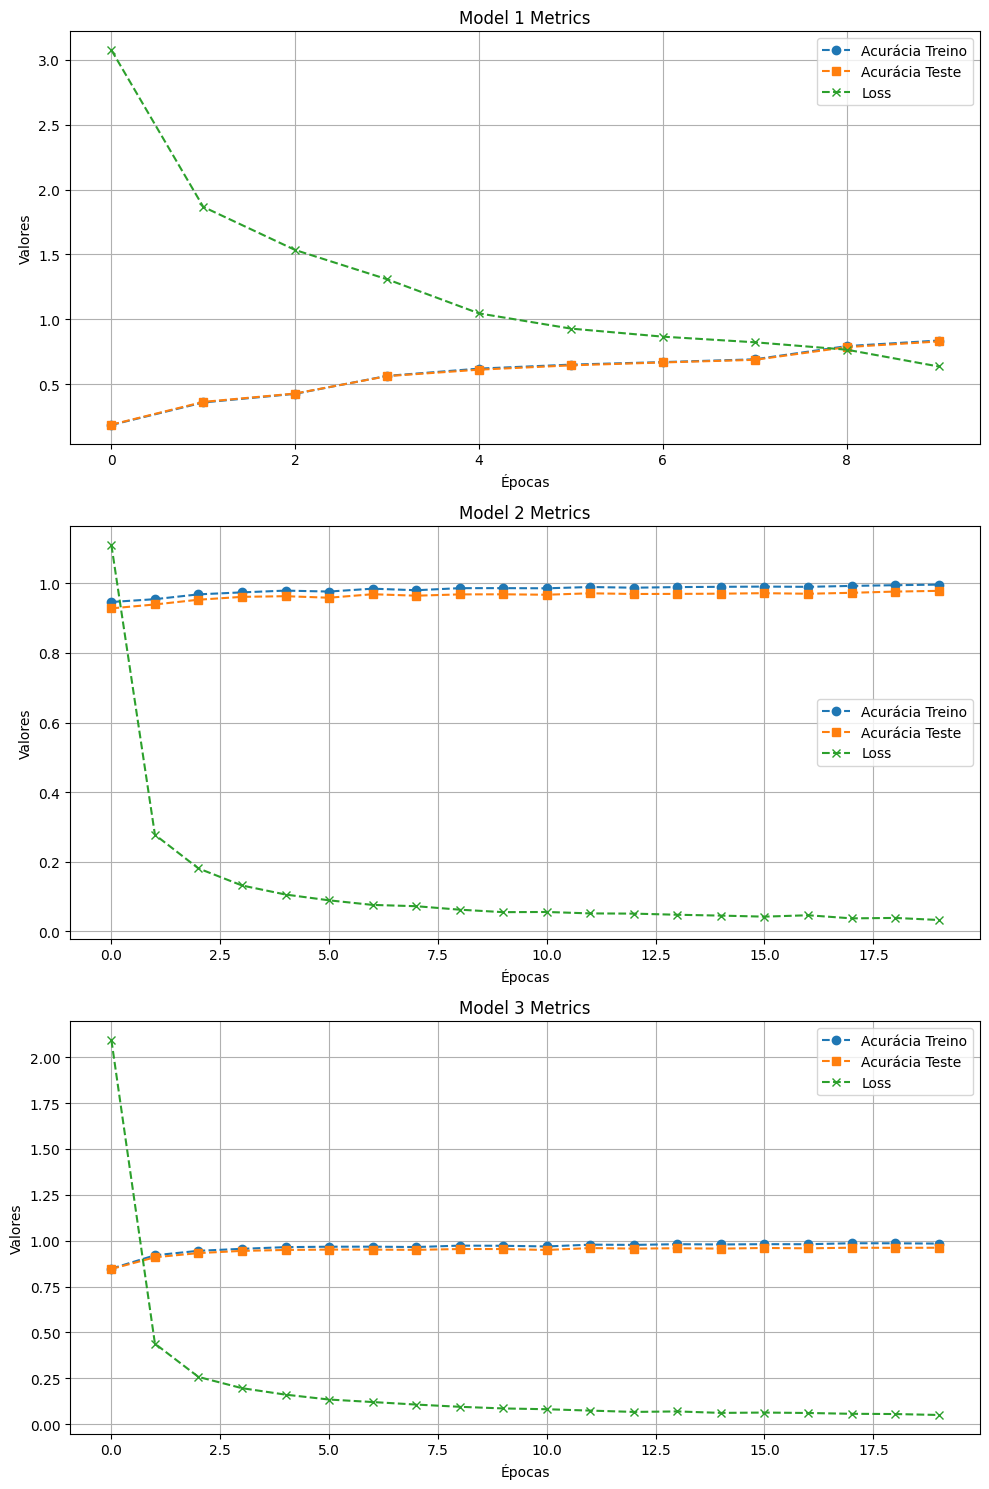

In [31]:
#Plota os resultados
plot_model_metrics_grid((accuracies_train1, accuracies_test1, losses1),
                        (accuracies_train2, accuracies_test2, losses2),
                        (accuracies_train3, accuracies_test3, losses3))

<div style="background-color: #eef6fc; border: 2px solid #007bff; border-radius: 12px; padding: 20px; font-family: Arial, sans-serif; color: #333333;">
    <h1 style="color: #0056b3; border-bottom: 2px solid #0056b3; padding-bottom: 5px;">Análise dos Gráficos de Métricas dos Modelos</h1>
    <p>Os gráficos apresentados mostram a evolução do <strong>loss</strong>, <strong>acurácia de treino</strong> e <strong>acurácia de teste</strong> ao longo das épocas para três modelos distintos. A seguir, analisamos o comportamento de cada modelo:</p>
    
<h2 style="color: #0056b3; margin-top: 20px;">Modelo 1</h2>
    <h3 style="color: #007bff;">Comportamento:</h3>
    <ul>
        <li>O <strong>loss</strong> permanece alto mesmo após várias épocas de treinamento.</li>
        <li>A <strong>acurácia</strong> de treino e a acurácia de teste são baixas</li>
    </ul>
    <h3 style="color: #007bff;">Análise:</h3>
    <p>O Modelo 1 apresenta <em>underfitting</em>. Isso ocorre porque o modelo não conseguiu aprender adequadamente os padrões dos dados de treino, resultando em baixa acurácia e <strong>loss</strong> elevado.</p>
    <p>Ajustes necessários incluem:</p>
    <ul>
        <li>Aumentar o número de épocas.</li>
        <li>Alterar a arquitetura do modelo para adicionar mais camadas ou neurônios.</li>
        <li>Ajustar a taxa de aprendizado para permitir um treinamento mais eficiente.</li>
    </ul>
    
<h2 style="color: #0056b3; margin-top: 20px;">Modelo 2</h2>
    <h3 style="color: #007bff;">Comportamento:</h3>
    <ul>
        <li>A <strong>acurácia</strong> de treino é muito alta, aproximando-se de 1.</li>
        <li>A <strong>acurácia</strong> de teste também é alta e segue a curva de treino de forma consistente.</li>
        <li>O <strong>loss</strong> converge para valores muito baixos, indicando que o modelo aprendeu os dados de forma eficiente.</li>
    </ul>
    <h3 style="color: #007bff;">Análise:</h3>
    <p>Apesar de o Modelo 2 apresentar uma acurácia de treino extremamente alta (sinal típico de <em>overfitting</em>), a acurácia de teste também é excelente, indicando que a base de dados representa bem a realidade.</p>
    <p>Isso significa que o <em>overfitting</em> observado no treino não prejudica a capacidade do modelo de generalizar para novos dados. O desempenho é muito bom, sem necessidade de ajustes significativos.</p>
    
<h2 style="color: #0056b3; margin-top: 20px;">Modelo 3</h2>
    <h3 style="color: #007bff;">Comportamento:</h3>
    <ul>
        <li>As curvas de <strong>acurácia</strong> de treino e acurácia de teste seguem um padrão semelhante ao do Modelo 2, indicando boa generalização.</li>
        <li>No entanto, os valores finais de <strong>acurácia</strong> são ligeiramente inferiores aos do Modelo 2.</li>
    </ul>
    <h3 style="color: #007bff;">Análise:</h3>
    <p>O Modelo 3 compartilha do mesmo princípio do Modelo 2: um <em>overfitting</em> nos dados de treino que, ainda assim, generaliza bem para novos dados.</p>
    <p>A principal diferença é que este modelo utiliza uma arquitetura com quantidades diferentes de neurônios ou camadas, o que impacta ligeiramente na performance.</p>
    <p>Embora a generalização seja boa, ele apresenta um desempenho geral um pouco inferior ao Modelo 2.</p>
</div>

# 4️⃣ Tarefa 04: Resultados e Visualizações 🤞🏻

## 🐳 Item a)

Gere e apresente uma matriz de confusão que mostre a distribuição das previsões do melhor modelo. Quais as métricas de Acurácia, Precisão, Recall e F1-Score para esse modelo?

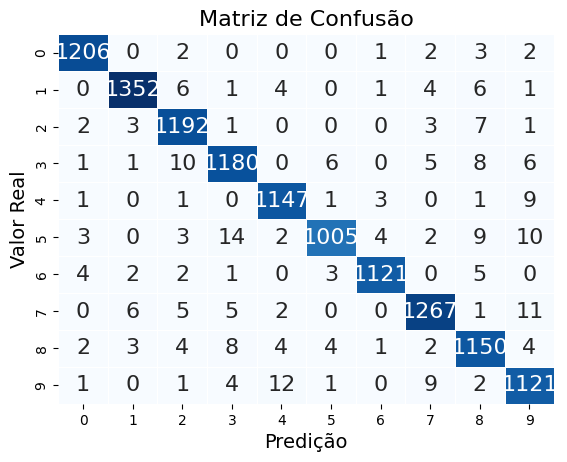

In [32]:
#Matriz de confusão
from sklearn.metrics import confusion_matrix
#Prediz o modelo
y_pred = model_2.predict(X_test)
#Cria a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
#Mostra a matriz de confusão com heatmap
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
            annot_kws={"size": 16}, linewidths=.5)
# Adiciona labels e título
plt.xlabel("Predição", fontsize=14)
plt.ylabel("Valor Real", fontsize=14)
plt.title("Matriz de Confusão", fontsize=16)
plt.show()


<div style="background-color: #eef6fc; border: 2px solid #007bff; border-radius: 12px; padding: 20px; font-family: Arial, sans-serif; color: #333333;">
    <h2 style="color: #2c3e50; text-align: center; font-weight: bold; margin-bottom: 20px;">Análise da Matriz de Confusão</h2>
    <p style="font-size: 18px; line-height: 1.8; color: #4a5568; margin-bottom: 20px;">
        A matriz de confusão é uma ferramenta essencial para avaliar a performance de um modelo de classificação. Ela nos permite visualizar a distribuição das previsões do modelo em relação aos valores reais.
    </p>
    <h3 style="color: #2980b9; margin-bottom: 15px;">Interpretação da Matriz de Confusão</h3>
    <p style="font-size: 18px; line-height: 1.8; color: #4a5568; margin-bottom: 20px;">
        Observando a matriz de confusão gerada, podemos notar que os valores absolutos na diagonal principal são significativamente maiores do que os valores nas bordas. Isso indica que o modelo está classificando a maioria dos exemplos corretamente.
    </p>
    <h3 style="color: #27ae60; margin-bottom: 15px;">Justificativa</h3>
    <p style="font-size: 18px; line-height: 1.8; color: #4a5568; margin-bottom: 20px;">
        <strong style="color: #2c5282;">Valores Altos na Diagonal Principal:</strong> 
        Os valores altos na diagonal principal representam o número de acertos do modelo, ou seja, quantas vezes o modelo previu corretamente a classe de um exemplo. Quanto mais altos esses valores, melhor é a performance do modelo.
    </p>
    <p style="font-size: 18px; line-height: 1.8; color: #4a5568; margin-bottom: 20px;">
        <strong style="color: #2c5282;">Valores Baixos nas Bordas:</strong> 
        Os valores nas bordas representam os erros de classificação, onde o modelo previu uma classe incorreta. Valores baixos nas bordas indicam que o modelo comete poucos erros, o que é desejável.
    </p>
    <h3 style="color: #e74c3c; margin-bottom: 15px;">Conclusão</h3>
    <p style="font-size: 18px; line-height: 1.8; color: #4a5568;">
        Com base na análise da matriz de confusão, podemos concluir que o modelo é bom, pois a maioria das previsões estão corretas, conforme indicado pelos valores altos na diagonal principal e valores baixos nas bordas. Isso sugere que o modelo tem uma alta taxa de acurácia e é eficaz na tarefa de classificação.
    </p>
</div>


In [33]:
#Metricas de classificação
from sklearn.metrics import classification_report
#Mostra a classificação
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1216
           1       0.99      0.98      0.99      1375
           2       0.97      0.99      0.98      1209
           3       0.97      0.97      0.97      1217
           4       0.98      0.99      0.98      1163
           5       0.99      0.96      0.97      1052
           6       0.99      0.99      0.99      1138
           7       0.98      0.98      0.98      1297
           8       0.96      0.97      0.97      1182
           9       0.96      0.97      0.97      1151

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000



<div style="background-color: #eef6fc; border: 2px solid #007bff; border-radius: 12px; padding: 20px; font-family: Arial, sans-serif; color: #333333;">
    <h2 style="color: #2c3e50; text-align: center; font-weight: bold; margin-bottom: 20px;">Análise do Relatório de Classificação</h2>
    <p style="font-size: 18px; line-height: 1.8; color: #4a5568; margin-bottom: 20px;">
        O relatório de classificação é uma ferramenta essencial para avaliar a performance de um modelo de classificação. Ele fornece métricas importantes como <strong style="color: #2c5282;">Precisão</strong>, <strong style="color: #2c5282;">Recall</strong> e <strong style="color: #2c5282;">F1-Score</strong> para cada classe, além da <strong style="color: #2c5282;">Acurácia</strong> geral do modelo.
    </p>
    <h3 style="color: #2980b9; margin-bottom: 15px;">Interpretação das Métricas</h3>
    <p style="font-size: 18px; line-height: 1.8; color: #4a5568; margin-bottom: 20px;">
        <strong style="color: #2c5282;">Precisão:</strong> A precisão indica a proporção de verdadeiros positivos entre as previsões positivas. Uma precisão alta significa que o modelo comete poucos erros ao prever uma classe específica.
    </p>
    <p style="font-size: 18px; line-height: 1.8; color: #4a5568; margin-bottom: 20px;">
        <strong style="color: #2c5282;">Recall:</strong> O recall mede a proporção de verdadeiros positivos entre os exemplos que realmente pertencem à classe. Um recall alto indica que o modelo consegue identificar a maioria dos exemplos de uma classe específica.
    </p>
    <p style="font-size: 18px; line-height: 1.8; color: #4a5568; margin-bottom: 20px;">
        <strong style="color: #2c5282;">F1-Score:</strong> O F1-Score é a média harmônica da precisão e do recall, proporcionando uma única métrica que equilibra ambos. Um F1-Score alto indica que o modelo tem um bom equilíbrio entre precisão e recall.
    </p>
    <h3 style="color: #27ae60; margin-bottom: 15px;">Justificativa</h3>
    <p style="font-size: 18px; line-height: 1.8; color: #4a5568; margin-bottom: 20px;">
        <strong style="color: #2c5282;">Métricas Próximas de 100%:</strong> Quando as métricas de precisão, recall e F1-Score estão muito próximas de 100%, isso significa que o modelo está performando de maneira excelente. Ele consegue prever corretamente a maioria dos exemplos e identificar corretamente as classes, com poucos erros.
    </p>
    <p style="font-size: 18px; line-height: 1.8; color: #4a5568; margin-bottom: 20px;">
        <strong style="color: #2c5282;">Modelo Adequado para Predição:</strong> Com métricas tão altas, podemos concluir que o modelo é adequado para a tarefa de predição. Ele é capaz de generalizar bem para novos dados, mantendo uma alta taxa de acertos e minimizando os erros de classificação.
    </p>
    <h3 style="color: #e74c3c; margin-bottom: 15px;">Conclusão</h3>
    <p style="font-size: 18px; line-height: 1.8; color: #4a5568;">
        Com base nas métricas apresentadas no relatório de classificação, podemos afirmar que o modelo é altamente eficaz para a tarefa de predição. As altas taxas de precisão, recall e F1-Score indicam que o modelo tem um desempenho excelente, sendo capaz de prever corretamente a maioria dos exemplos e identificar corretamente as classes.
    </p>
</div>

## 🐸 Item b)

Exiba gráficos que mostram a evolução da acurácia e da perda (`Loss`) durante o treinamento do melhor modelo encontrado no item 3c).

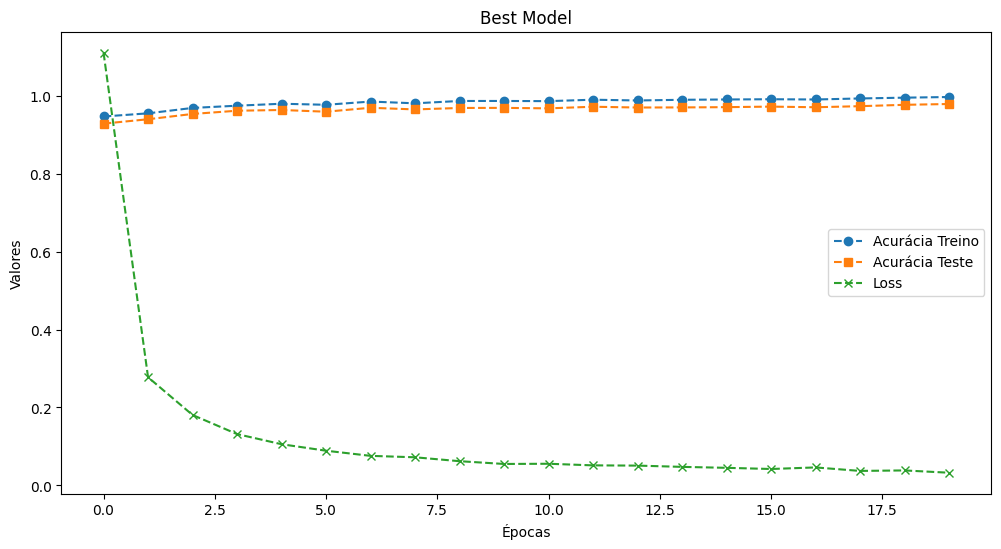

In [34]:
#plota o grafico de acuracia e loss para modelo 2
plt.figure(figsize=(12, 6))
plt.plot(accuracies_train2, label="Acurácia Treino", linestyle="--", marker="o")
plt.plot(accuracies_test2, label="Acurácia Teste", linestyle="--", marker="s")
#Plota o loss
plt.plot(losses2, label="Loss", linestyle="--", marker="x")
#Adiciona labels e titulo
plt.xlabel("Épocas")
plt.ylabel("Valores")
plt.title("Best Model")
plt.legend()



## 🦖 Item c)

Escolha algumas imagens do conjunto de teste e mostre previsões do seu modelo, com acertos e erros. Discuta quais fatores podem ter contribuído para essas previsões corretas e incorretas.

In [98]:
#Reconstruindo X_test em imagens
X_test_images = X_test.reshape(X_test.shape[0], 28, 28)

In [101]:

# Ativar a saída do Bokeh no notebook
output_notebook()
# Definir o número de imagens a serem exibidas para não sobrecarregar o notebook
num_images = 1000
# Converter as primeiras 100 imagens para listas de listas
images = [X_test_images[i] for i in range(num_images)]

# Configurar a fonte de dados inicial com a primeira imagem
source = ColumnDataSource(data={'image': [images[0]]})

# Criar a figura para exibir a imagem
plot = figure(x_range=(0, 28), y_range=(28, 0), width=400, height=400)
plot.image('image', source=source, x=0, y=0, dw=28, dh=28, palette="Greys256")

# Criar um slider para selecionar o índice da imagem
slider = Slider(start=0, end=num_images - 1, value=0, step=1, title="Índice da Imagem")
#Titulo
plot.title.text = f"Grafíco interativo dataset MNIST"
# Adicionar o callback JavaScript para atualizar a imagem
slider.js_on_change("value", CustomJS(args=dict(source=source, images=images), code="""
    const idx = cb_obj.value;
    source.data = {image: [images[idx]]};
    source.change.emit();
"""))

# Dispor o layout
layout = column(slider, plot)

# Mostrar o layout no notebook
show(layout)

Loading BokehJS ...

In [ ]:
# Wrong predictions
wrong_predictions = np.where(y_test != y_pred)[0]

array([ 22, 143, 218, 260], dtype=int64)

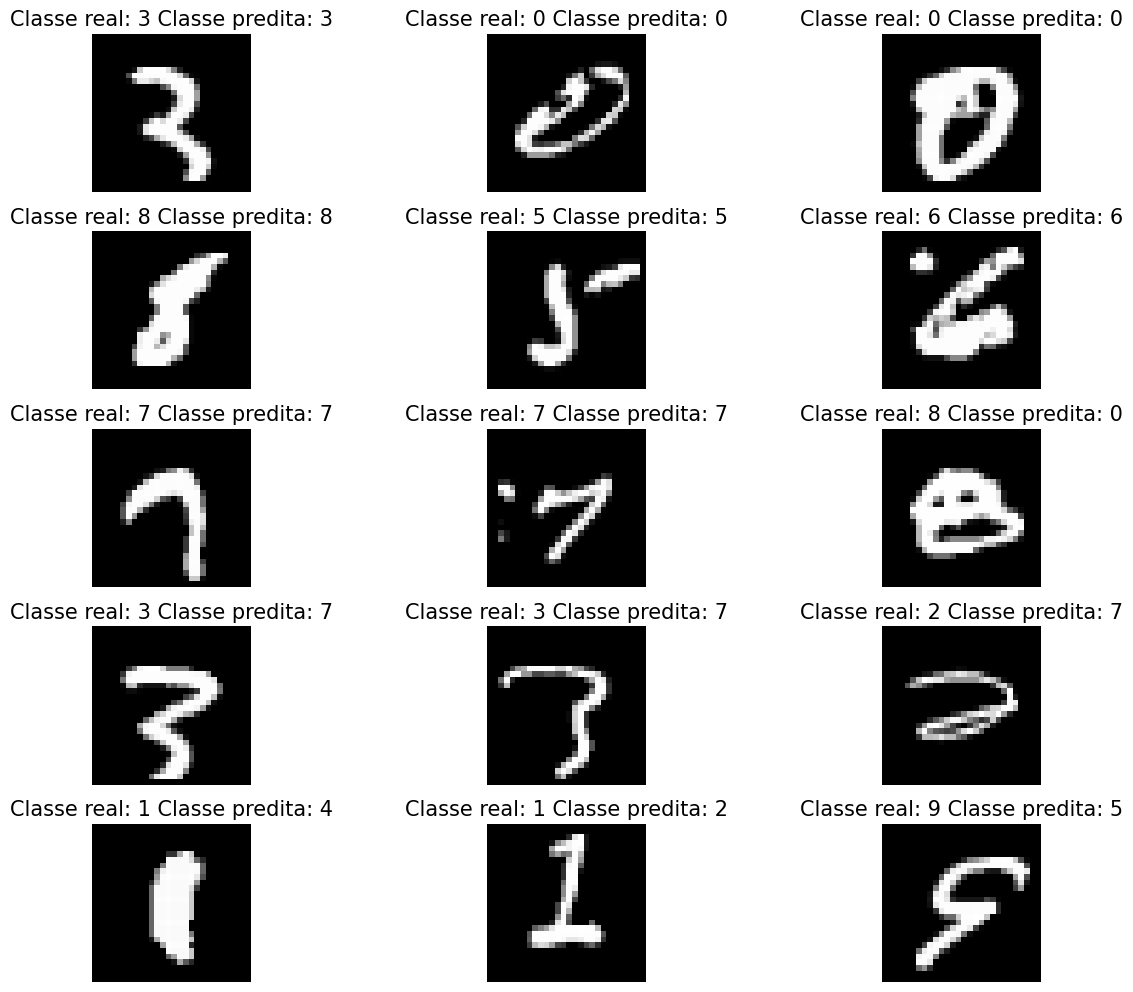

In [107]:
tries = np.array([282,292,341,355,364,384,422,573,607])
#Add wrong predictions
tries = np.concatenate((tries, wrong_predictions[:6]))


images = [X_test_images[i] for i in tries]
titles = [f"Classe real: {y_test[i]} Classe predita: {model_2.predict(X_test[i].reshape(1,-1))[0]}" for i in tries]


show_images(images, titles)


<div style="background-color: #eef6fc; border: 2px solid #007bff; border-radius: 12px; padding: 20px; font-family: Arial, sans-serif; color: #333333;">
    <h2 style="color: #2c3e50; text-align: center; font-weight: bold; margin-bottom: 20px;">Análise dos Erros da IA</h2>
    <p style="font-size: 18px; line-height: 1.8; color: #4a5568; margin-bottom: 20px;">
        Foram selecionadas as primeiras 9 imagens que foram julgadas como difíceis para a IA acertar. Com isso, a IA alcançou uma precisão de <strong style="color: #2c5282;">90%</strong>, errando apenas a classificação da oitava imagem, que foi classificada como <strong style="color: #2c5282;">0</strong>. Acredita-se que o erro ocorreu devido ao formato muito redondo do número.
    </p>
    <h3 style="color: #2980b9; margin-bottom: 15px;">Análise das Classes Preditadas Erradas</h3>
    <ul style="font-size: 18px; line-height: 1.8; color: #4a5568; margin-left: 20px; padding-left: 20px; margin-bottom: 20px;">
        <li>
            <strong style="color: #2c5282;">Classe 3 - Classificada como 7:</strong> 
            Os dois números <strong style="color: #2c5282;">3</strong> que aparecem possuem a parte de cima muito parecida com um <strong style="color: #2c5282;">7</strong>. É possível que a IA dê muito peso para a parte superior ao fazer essa classificação.
        </li>
        <li>
            <strong style="color: #2c5282;">Classe 2 - Classificada como 7:</strong> 
            A mesma análise da classe 3 se aplica aqui: a parte superior do número tem grande peso na classificação como <strong style="color: #2c5282;">7</strong>. Além disso, esse <strong style="color: #2c5282;">2</strong> está escrito de maneira bem irregular.
        </li>
        <li>
            <strong style="color: #2c5282;">Classe 1 - Classificada como 4:</strong> 
            Esse erro é mais difícil de interpretar. O <strong style="color: #2c5282;">1</strong> está bem largo, mas não há uma correspondência clara que explique a classificação como <strong style="color: #2c5282;">4</strong>.
        </li>
        <li>
            <strong style="color: #2c5282;">Classe 1 - Classificada como 2:</strong> 
            Isso provavelmente ocorre devido à parte inferior do número. A maior parte dos números <strong style="color: #2c5282;">1</strong> na base de dados é representada apenas como um traço, então faz sentido que a IA tenha classificado como <strong style="color: #2c5282;">2</strong>.
        </li>
        <li>
            <strong style="color: #2c5282;">Classe 9 - Classificada como 5:</strong> 
            O fato de o final do número <strong style="color: #2c5282;">9</strong> não estar fechado realmente faz com que ele se pareça com um <strong style="color: #2c5282;">5</strong>.
        </li>
    </ul>
    <h3 style="color: #27ae60; margin-bottom: 15px;">Conclusão</h3>
    <p style="font-size: 18px; line-height: 1.8; color: #4a5568;">
        A maior parte dos erros pode ser explicada, e é importante ressaltar que a IA demonstrou a capacidade de acertar números com formas bem irregulares e até mesmo borrões, como mostrado na análise da sexta imagem. Isso reforça sua robustez para lidar com dados desafiadores.
    </p>
</div>

---

# 5️⃣ Tarefa 05: Lembrete *Kaggle* e Documentação 🗃️

## 😮‍💨 Item a)

# Lembre-se de publicar no *Kaggle* com o título correto e padronizado!

## 🙏🏻 Item b)

# Lembre-se de documentar adequadamente seu código e conclusões!

In [114]:
#Output pro kaggle do X_val
output = model_2.predict(X_val.reshape(X_val.shape[0], 28*28))

In [ ]:
# Arquivo de submissão
import pandas as pd

df = pd.DataFrame({'ID': np.arange(1,10001), 'Answer':output})

df.set_index("ID", inplace=True)

df.to_csv('submission.csv')

df.head()

(10000,)

(10000, 28, 28)